#<b> E-commerce Churn Prediction

-------------------
---------------------

# <b>1. Introduction</b>  

-------------------
---------------------

## <b>1.1. Business Understanding



Treepedia, a prominent e-commerce company, is grappling with a significant business challenge: elevated customer churn rates. Customer churn, defined as the cessation of purchasing activity or engagement with the platform, has a direct impact on Treepedia's revenue generation and growth potential. Each churned customer represents lost revenue from potential future purchases.

Understanding and proactively addressing churn is of paramount importance for Treepedia. By identifying the key drivers of churn and accurately predicting which customers are likely to discontinue their relationship with the company, Treepedia can implement targeted retention strategies to enhance customer loyalty and, ultimately, protect its revenue streams.



## <b>1.2. Business Problem


The central question this project seeks to answer is: How can Treepedia leverage its wealth of customer data, encompassing demographics, purchase history, satisfaction metrics, and other relevant factors, to accurately predict customer churn and mitigate its adverse effects on revenue?



## <b>1.3. Objectives



- Primary Objective: Minimize revenue loss due to churn by developing a predictive model capable of accurately identifying customers at high risk of churn.
- Secondary Objective: Optimize the allocation of resources dedicated to retention efforts by minimizing false positive predictions, thereby ensuring that efforts are focused on customers genuinely at risk of churn.


## <b>1.4. Problem-Solving Approach



Treepedia will employ a data-driven methodology utilizing tree-based machine learning models:

1. Data Preparation: Rigorously clean and preprocess historical customer data, ensuring data quality and suitability for tree-based algorithms.
2. Exploratory Data Analysis (EDA): Conduct a comprehensive analysis and visualization of the data to identify salient patterns, trends, and correlations between customer attributes and churn behavior.
3. Model Development: Develop and train a variety of tree-based models (e.g., decision trees, random forests, XGBoost) directly on the prepared dataset, leveraging their inherent ability to handle complex relationships without extensive feature engineering.
4. Model Evaluation: Evaluate the performance of each model using recall (primary metric) and precision (secondary metric) to achieve a balance between identifying potential churners and avoiding misclassification of loyal customers.
5. Model Selection and Optimization: Select the model that demonstrates superior performance in identifying churned customers, while considering the cost-benefit trade-off of retention strategies to find the optimal balance between recall and precision.


## <b>1.5. Evaluation Metrics



- Primary Metric: Recall (minimize false negatives). The priority is to identify the maximum number of potential churners to prevent revenue loss.
- Secondary Metric: Precision (minimize false positives). This is important to avoid wasting resources on retaining customers who would have remained loyal.


## <b>1.6. Business Metrics



- Revenue Loss Due to Churn: The financial impact of customers who churned but were not predicted by the model.
- Wasted Resources: The cost of resources allocated to retention efforts for customers who were incorrectly predicted to churn and would have likely remained loyal.


## <b>1.7. Data



The data set belongs to a leading online E-commerce company. An online retail (E-commerce) company wants to know the customers who are going to churn, so accordingly, they can approach customers to offer some promos.

| Feature                   | Description                                                   |
|---------------------------|---------------------------------------------------------------|
| **Tenure**                | Tenure of a customer in the company.                          |
| **WarehouseToHome**       | Distance between the warehouse to the customer’s home.        |
| **NumberOfDeviceRegistered** | Total number of devices registered on a particular customer. |
| **PreferedOrderCat**      | Preferred order category of a customer in the last month.     |
| **SatisfactionScore**     | Satisfactory score of a customer on service.                  |
| **MaritalStatus**         | Marital status of a customer.                                 |
| **NumberOfAddress**       | Total number of addresses added by a particular customer.     |
| **Complaint**             | Any complaint raised in the last month.                       |
| **DaySinceLastOrder**     | Days since the last order by the customer.                    |
| **CashbackAmount**        | Average cashback in the last month.                           |
| **Churn**                 | Churn flag.                                                   |


The dataset provided by Treepedia comprises historical customer records, encompassing demographic information, purchase history, engagement metrics, and churn status.






-------------------
---------------------

**Import Libraries**

In [125]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_predict,
    cross_val_score,
    StratifiedKFold,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    make_scorer,
    recall_score,
    precision_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve
)
from sklearn.metrics._scorer import _SCORERS
from sklearn.inspection import permutation_importance

from sklearn.impute import KNNImputer, SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.pipeline import Pipeline as ImbPipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor

# import phik
import joblib

import warnings
warnings.filterwarnings('ignore')

-------------------
---------------------

# <b>2. Data Understanding and EDA

-------------------
---------------------

**Data Exploration**

In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [3]:
# Check the dataset
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


**Check data duplicate**

In [4]:
print("Total of duplicated rows in this dataset is", df.duplicated().sum())
duplicate_percentage = (df.duplicated().sum() / len(df) * 100).round(2)
print("The percentage of duplicated rows is", duplicate_percentage, "%")

Total of duplicated rows in this dataset is 671
The percentage of duplicated rows is 17.03 %


In [5]:
# Drop duplicate
df.drop_duplicates(inplace=True)
df.shape

(3270, 11)

**Check missing values**

In [6]:
null_total = df.isnull().sum()
null_percentage = (df.isnull().sum() / len(df)) * 100

null_df = pd.DataFrame({
    'Feature': null_total.index,
    'Total Null Values': null_total.values,
    'Percentage Null Values': null_percentage.values
})

null_df.round(2)

,Feature,Total Null Values,Percentage Null Values
0,Tenure,160,4.89
1,WarehouseToHome,135,4.13
2,NumberOfDeviceRegistered,0,0.00
3,PreferedOrderCat,0,0.00
4,SatisfactionScore,0,0.00
5,MaritalStatus,0,0.00
6,NumberOfAddress,0,0.00
7,Complain,0,0.00
8,DaySinceLastOrder,181,5.54
9,CashbackAmount,0,0.00


**Check descriptive summary of numerical features**

In [7]:
df.describe().round(3)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.000,3135.000,3270.000,3270.000,3270.000,3270.000,3089.000,3270.000,3270.000
mean,10.190,15.510,3.676,3.021,4.223,0.282,4.545,177.418,0.163
std,8.651,8.568,1.017,1.395,2.623,0.450,3.696,49.311,0.370
min,0.000,5.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,2.000,9.000,3.000,2.000,2.000,0.000,2.000,145.892,0.000
50%,9.000,13.000,4.000,3.000,3.000,0.000,3.000,163.885,0.000
75%,16.000,20.000,4.000,4.000,6.000,1.000,7.000,197.138,0.000
max,61.000,127.000,6.000,5.000,22.000,1.000,46.000,324.990,1.000


**Check descriptive summary of categorical features**

In [8]:
df.describe(include='object')

,PreferedOrderCat,MaritalStatus
count,3270,3270
unique,6,3
top,Laptop & Accessory,Married
freq,1213,1686


# <b>3. Data Cleaning

**Function for data cleaning**

In [9]:
def plot_histogram(df, target_col):
    """
    Plots a histogram for the specified column in the DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.
    target_col (str): The column for which to plot the histogram.

    """
    unique_values = df[target_col].nunique()

    # Set plot size and plot histogram with KDE
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=target_col, bins=min(unique_values, 30), kde=True)
    plt.title(f'{target_col} Distribution')
    plt.xlabel(target_col)
    plt.ylabel('Count')
    plt.show()

def counts_bottom_n(df, target_col, n):
    """
    Returns the bottom n value counts for a specified column in the DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame.
    target_col (str): The column for which to perform value counts.
    n (int): The number of bottom values to return.

    """
    # Perform value counts, reset index, rename columns, sort by count, and get bottom n values
    value_counts = df[target_col].value_counts().reset_index()
    value_counts.columns = [target_col, 'count']
    n = min(n, df[target_col].nunique())  # Ensure n does not exceed the number of unique values
    bottom_n_counts = value_counts.sort_values(by='count').head(n)
    return bottom_n_counts

def count_nulls_by_group(df, group_col, target_col):
    """
    Counts the number of null values in the target column grouped by the specified column.

    Parameters:
    df (DataFrame): The input DataFrame.
    group_col (str): The column by which to group the data.
    target_col (str): The column for which to count null values.
    """
    # Filter rows where target column is null
    null_df = df[df[target_col].isna()]

    # Group by the specified column and count null values in the target column
    null_counts = null_df.groupby(group_col).agg(count=(target_col, 'size')).reset_index()
    return null_counts

def generate_stats(df, target_col, group_cols):
    """
    Generates statistics (median, count, and percentage) for the target column grouped by specified columns.

    Parameters:
    df (DataFrame): The input DataFrame.
    target_col (str): The column for which to calculate statistics.
    group_cols (list of str): The columns by which to group the data.

    Returns:
    DataFrame: A DataFrame containing the calculated statistics.

    """
    # Calculate median and count for the target column
    stats = df.groupby(group_cols)[target_col].agg(['median', 'count']).reset_index()
    stats.rename(columns={'median': f'{target_col} Median', 'count': 'Count'}, inplace=True)

    # Calculate total count per group
    total_counts = df.groupby(group_cols[0])['Churn'].count().reset_index()
    total_counts.rename(columns={'Churn': 'Total Count'}, inplace=True)

    # Merge total counts with stats
    stats = pd.merge(stats, total_counts, on=group_cols[0])

    # Calculate percentage
    stats['Percentage'] = (stats['Count'] / stats['Total Count']) * 100
    stats.drop(columns=['Total Count'], inplace=True)
    return stats.round(2)

def fill_missing_value(df, target_col, stats_df, group_cols, stats_col):
    """
    Fills missing values in the target column using median values from stats_df.

    Parameters:
    df (DataFrame): The input DataFrame.
    target_col (str): The column with missing values to fill.
    stats_df (DataFrame): DataFrame containing the median values.
    group_cols (list of str): Columns to use for grouping in stats_df.
    stats_col (str): Column in stats_df containing the median values.

    """
    def fill_missing(row):
        if pd.isna(row[target_col]):
            lookup_values = tuple(row[col] for col in group_cols)
            try:
                median_value = stats_df.set_index(group_cols).loc[lookup_values, stats_col]
            except KeyError:
                median_value = None  # Handle cases where lookup values do not exist in stats_df
            return median_value
        else:
            return row[target_col]

    # Apply the fill_missing function to each row in the DataFrame
    df[target_col] = df.apply(fill_missing, axis=1)

    return df

## <b>3.1. Categorical Features

**Check categorical features**

In [10]:
cat = df.select_dtypes(include=['object']).columns
cat

Index(['PreferedOrderCat', 'MaritalStatus'], dtype='object')

**Check unique values of categorical features**

In [11]:
for col in cat:
  print(col, df[col].unique())

PreferedOrderCat ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']
MaritalStatus ['Single' 'Married' 'Divorced']


**Standardizing the values in the PreferedOrderCat column**

Renaming the category 'Mobile' to 'Mobile Phone' to ensure that all entries referring to mobile phones are standardized to 'Mobile Phone', improving data consistency and reducing category duplication.


In [12]:
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True)

#### <b>PreferedOrderCat
Preferred order category of a customer in the last month.

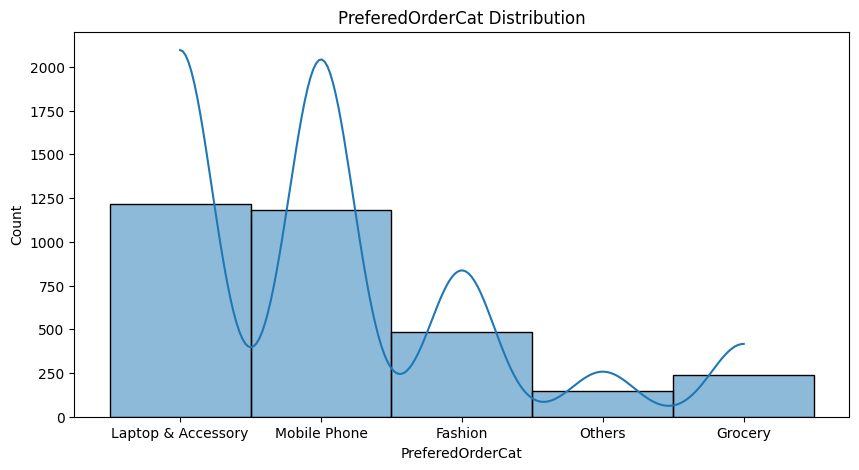

In [15]:
plot_histogram(df, 'PreferedOrderCat')

In [16]:
df['PreferedOrderCat'].value_counts().reset_index()

,PreferedOrderCat,count
0,Laptop & Accessory,1213
1,Mobile Phone,1182
2,Fashion,484
3,Grocery,241
4,Others,149


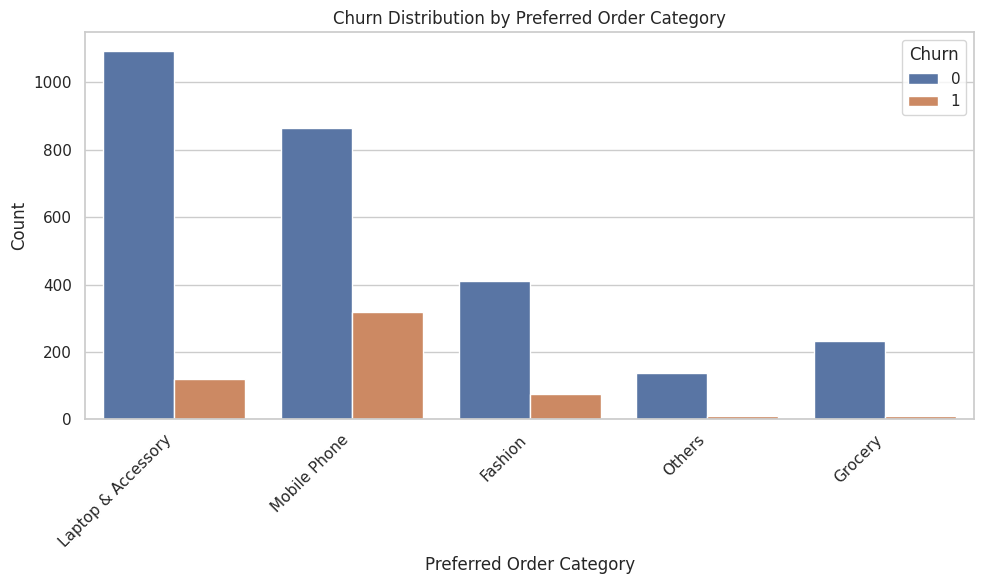

In [17]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(data=df, x='PreferedOrderCat', hue='Churn')
plt.title('Churn Distribution by Preferred Order Category')
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

**Summary:** PreferedOrderCat dominated by Laptop & Accessory and Mobile Phone, but Mobile Phone has higher churn rate.

#### <b>MaritalStatus
Marital status of a customer.

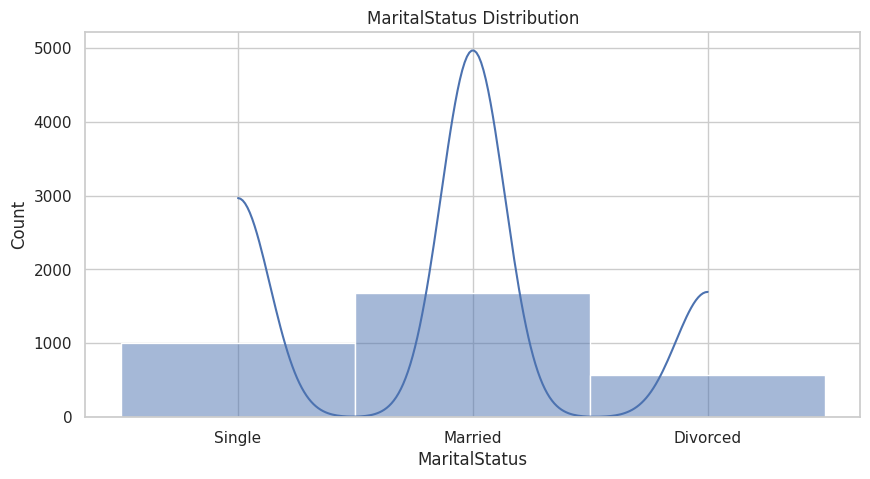

In [18]:
plot_histogram(df, 'MaritalStatus')

In [19]:
df['MaritalStatus'].value_counts().reset_index()

,MaritalStatus,count
0,Married,1686
1,Single,1007
2,Divorced,576


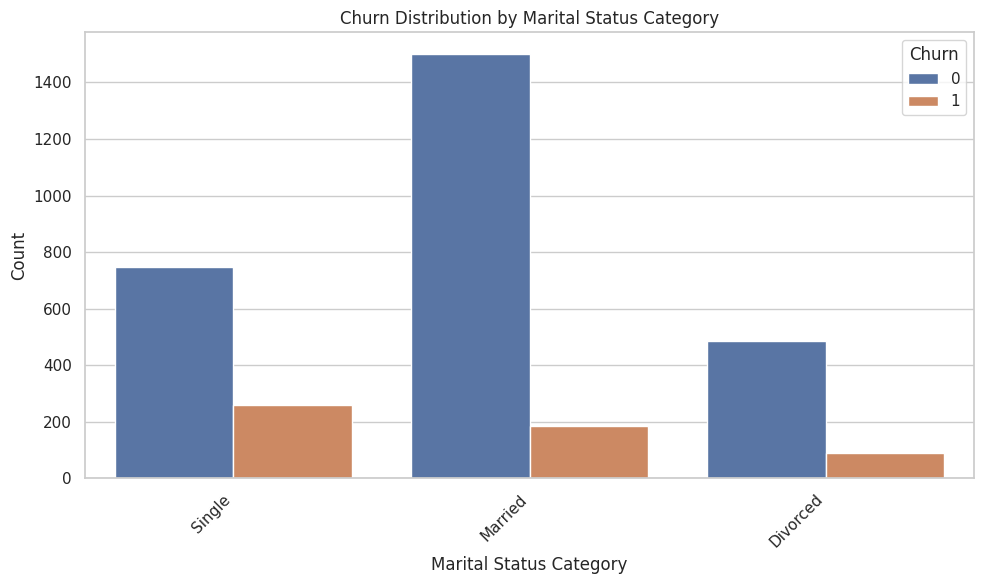

In [20]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(data=df, x='MaritalStatus', hue='Churn')
plt.title('Churn Distribution by Marital Status Category')
plt.xlabel('Marital Status Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

**Summary** MaritalStatus dominated by Married, but Single have higher churn rate.

## <b>3.2. Numerical Features

#### <b>Tenure
Tenure of a customer in the company

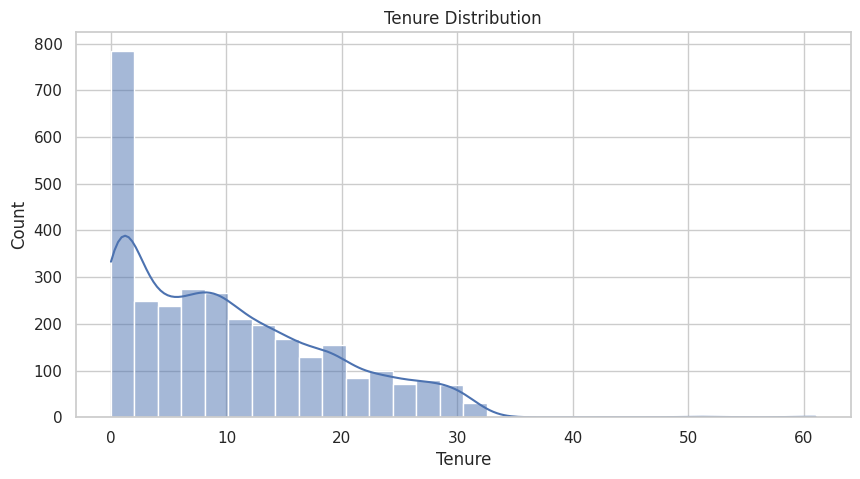

In [21]:
plot_histogram(df, 'Tenure')

In [22]:
Tenure_counts = counts_bottom_n(df, 'Tenure', 10)
Tenure_counts

,Tenure,count
35,50.0,1
32,61.0,1
34,60.0,1
33,51.0,1
31,31.0,30
30,29.0,30
29,25.0,35
28,26.0,37
27,28.0,39
26,30.0,40


In [23]:
df = df[~df['Tenure'].isin(Tenure_counts[Tenure_counts['count'] == 1]['Tenure'])]

In [24]:
df[df['Tenure'].isna()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
16,NaN,21.0,5,Mobile Phone,1,Married,1,1,3.0,121.68,0
37,NaN,6.0,4,Mobile Phone,5,Married,2,0,2.0,122.18,0
44,NaN,7.0,4,Mobile Phone,3,Married,2,0,0.0,120.08,0
85,NaN,6.0,3,Mobile Phone,1,Married,4,0,2.0,122.70,0
93,NaN,15.0,3,Mobile Phone,1,Married,4,0,3.0,120.75,0
...,...,...,...,...,...,...,...,...,...,...,...
3792,NaN,24.0,3,Mobile Phone,1,Single,2,0,7.0,121.53,0
3814,NaN,8.0,3,Mobile Phone,5,Divorced,7,1,2.0,120.42,1
3842,NaN,26.0,3,Mobile Phone,3,Married,5,0,0.0,122.59,0
3853,NaN,28.0,3,Mobile Phone,3,Single,2,1,0.0,116.75,1


In [25]:
count_nulls_by_group(df, 'PreferedOrderCat', 'Tenure')

,PreferedOrderCat,count
0,Laptop & Accessory,7
1,Mobile Phone,152


In [26]:
Tenure_stats = generate_stats(df, 'Tenure', ['PreferedOrderCat', 'Churn'])
Tenure_stats

,PreferedOrderCat,Churn,Tenure Median,Count,Percentage
0,Fashion,0,11.0,409,84.50
1,Fashion,1,1.0,75,15.50
2,Grocery,0,22.0,229,95.82
3,Grocery,1,4.5,10,4.18
4,Laptop & Accessory,0,9.0,1087,89.76
5,Laptop & Accessory,1,1.0,117,9.66
6,Mobile Phone,0,6.0,757,64.04
7,Mobile Phone,1,1.0,273,23.10
8,Others,0,20.0,138,92.62
9,Others,1,15.0,11,7.38


In [27]:
df = fill_missing_value(df, 'Tenure', Tenure_stats, ['PreferedOrderCat', 'Churn'], 'Tenure Median')

In [28]:
df.duplicated().sum()

0

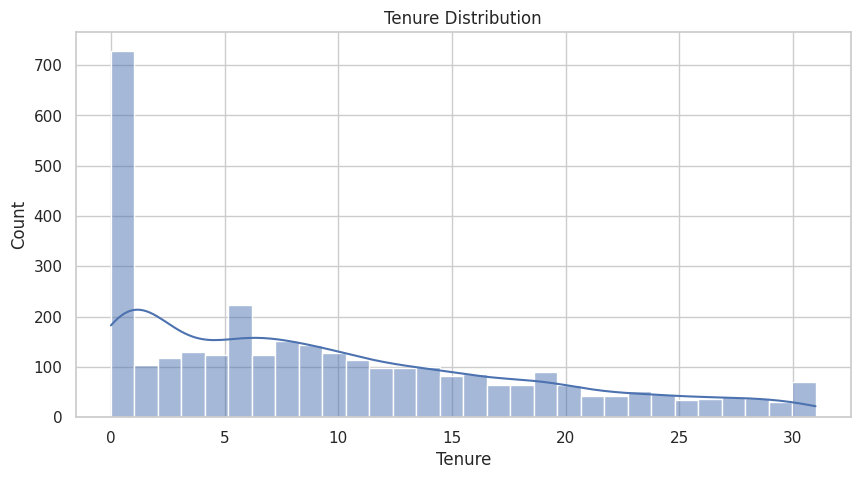

In [29]:
plot_histogram(df, 'Tenure')

**Summary:** Majority of ustomer have Tenure = 0

#### <b>WarehouseToHome
Distance between the warehouse to the customer’s home

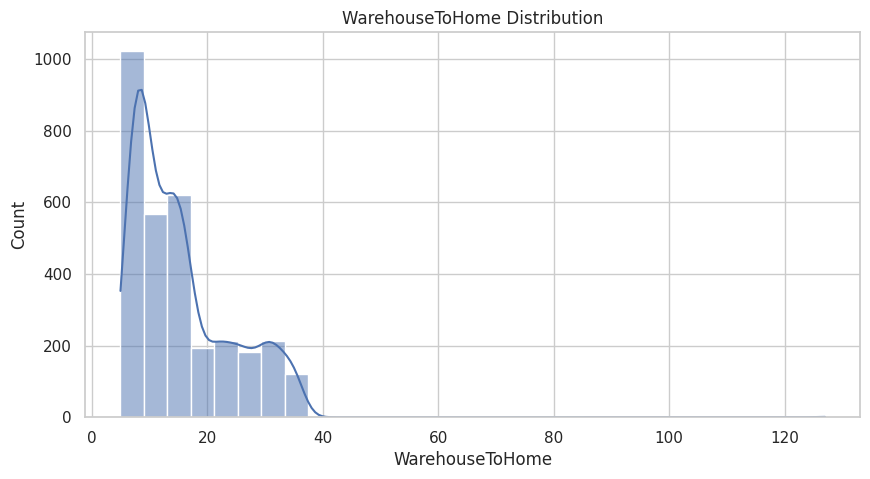

In [30]:
plot_histogram(df, 'WarehouseToHome')

In [31]:
WarehouseToHome_counts = counts_bottom_n(df, 'WarehouseToHome', 10)
WarehouseToHome_counts

,WarehouseToHome,count
32,127.0,1
31,5.0,6
30,36.0,30
29,34.0,35
28,20.0,41
27,33.0,42
26,28.0,42
25,29.0,43
24,19.0,45
23,27.0,45


In [32]:
df = df[~df['WarehouseToHome'].isin(WarehouseToHome_counts[WarehouseToHome_counts['count'] == 1]['WarehouseToHome'])]

In [33]:
df[df['WarehouseToHome'].isna()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
27,0.0,NaN,1,Mobile Phone,3,Single,4,1,3.0,124.32,1
33,0.0,NaN,4,Mobile Phone,4,Divorced,6,0,1.0,125.46,1
34,0.0,NaN,4,Mobile Phone,1,Married,6,0,3.0,123.67,1
35,0.0,NaN,3,Mobile Phone,5,Married,4,0,0.0,123.22,0
57,0.0,NaN,4,Mobile Phone,4,Married,2,0,3.0,123.68,0
...,...,...,...,...,...,...,...,...,...,...,...
3799,0.0,NaN,3,Mobile Phone,1,Married,2,1,0.0,125.15,1
3851,3.0,NaN,3,Mobile Phone,4,Divorced,2,0,0.0,124.76,0
3871,7.0,NaN,1,Mobile Phone,3,Married,1,0,0.0,125.85,0
3898,0.0,NaN,3,Mobile Phone,3,Married,2,0,2.0,126.10,1


In [34]:
count_nulls_by_group(df, 'PreferedOrderCat', 'WarehouseToHome')

,PreferedOrderCat,count
0,Laptop & Accessory,5
1,Mobile Phone,130


In [35]:
WarehouseToHome_stats = generate_stats(df, 'WarehouseToHome', ['PreferedOrderCat', 'Churn'])
WarehouseToHome_stats

,PreferedOrderCat,Churn,WarehouseToHome Median,Count,Percentage
0,Fashion,0,14.0,409,84.50
1,Fashion,1,18.0,75,15.50
2,Grocery,0,12.0,229,95.82
3,Grocery,1,18.5,10,4.18
4,Laptop & Accessory,0,14.0,1087,89.76
5,Laptop & Accessory,1,17.0,119,9.83
6,Mobile Phone,0,12.0,778,65.88
7,Mobile Phone,1,14.0,273,23.12
8,Others,0,11.0,138,92.62
9,Others,1,9.0,11,7.38


In [36]:
df = fill_missing_value(df, 'WarehouseToHome', WarehouseToHome_stats, ['PreferedOrderCat', 'Churn'], 'WarehouseToHome Median')

In [37]:
df.duplicated().sum()

0

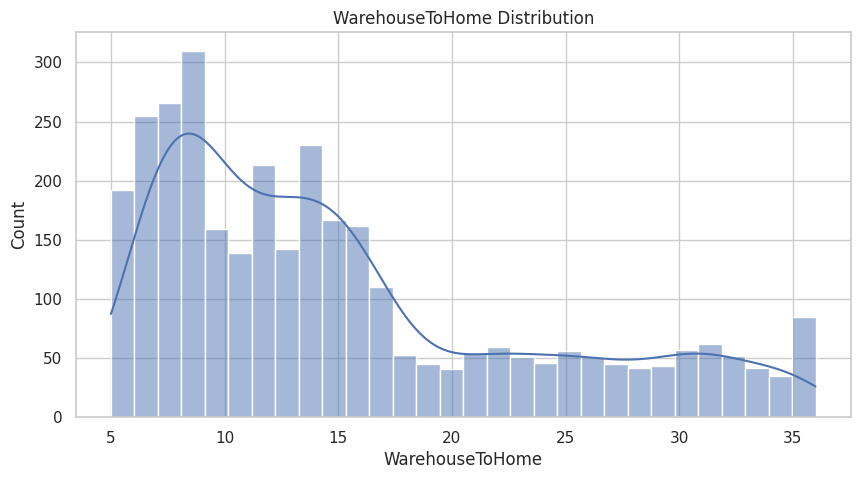

In [38]:
plot_histogram(df, 'WarehouseToHome')

#### <b>NumberOfDeviceRegistered
Total number of deceives is registered on a particular customer.

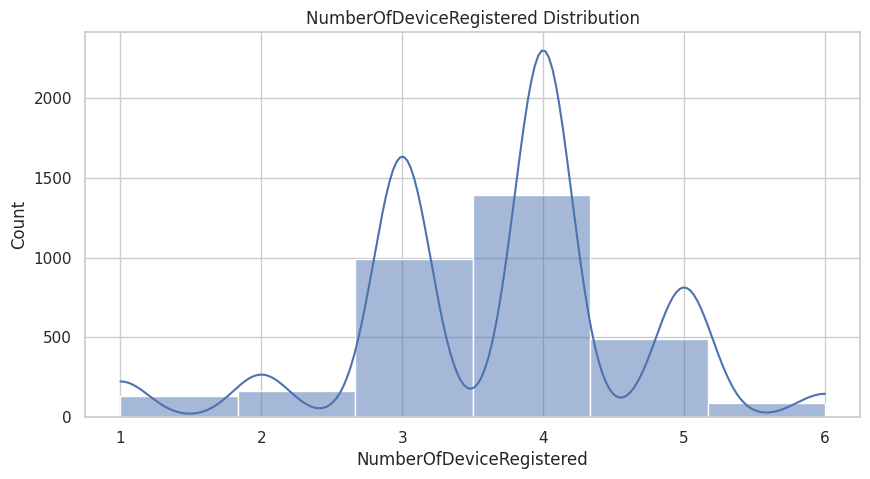

In [39]:
plot_histogram(df, 'NumberOfDeviceRegistered')

In [40]:
df['NumberOfDeviceRegistered'].value_counts().reset_index()

,NumberOfDeviceRegistered,count
0,4,1394
1,3,990
2,5,493
3,2,162
4,1,136
5,6,89


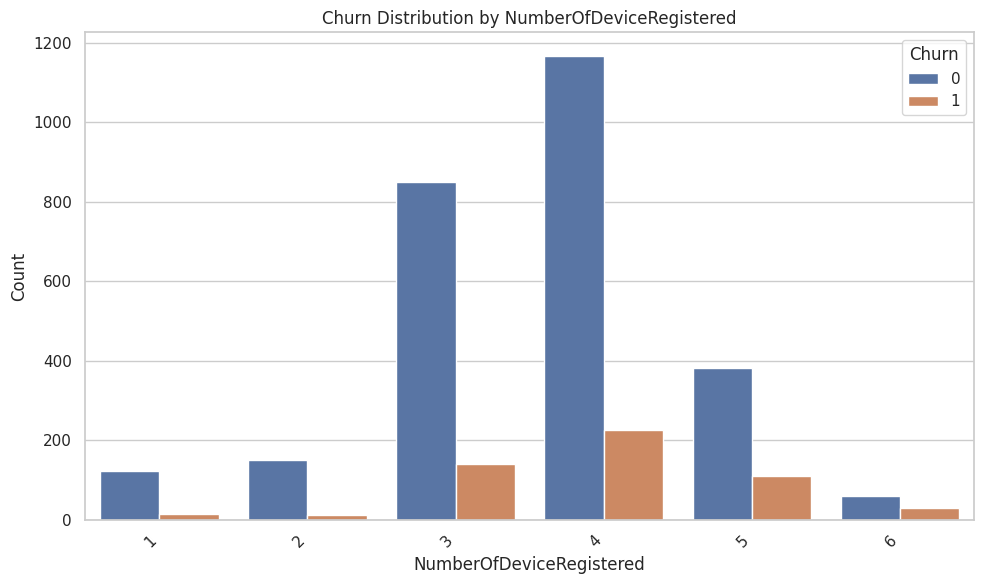

In [41]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(data=df, x='NumberOfDeviceRegistered', hue='Churn')
plt.title('Churn Distribution by NumberOfDeviceRegistered')
plt.xlabel('NumberOfDeviceRegistered')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

#### <b>SatisfactionScore
Satisfactory score of a customer on service.

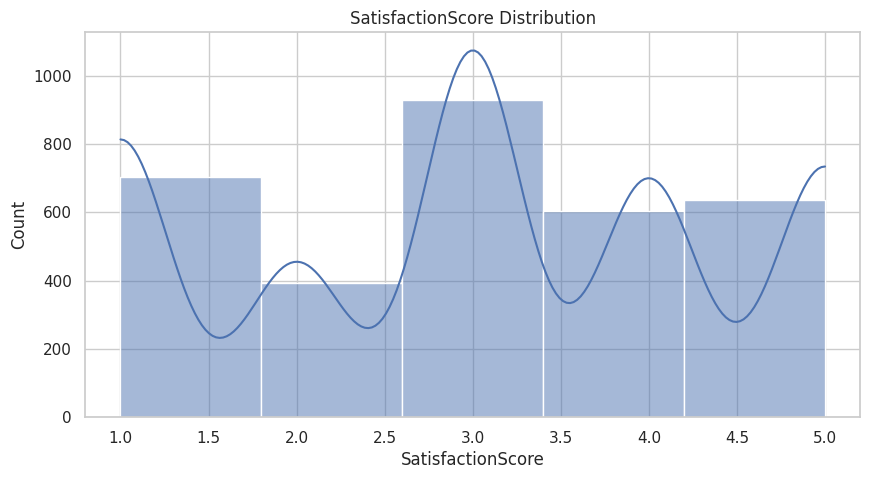

In [42]:
plot_histogram(df, 'SatisfactionScore')

In [43]:
df['SatisfactionScore'].value_counts().reset_index()

,SatisfactionScore,count
0,3,929
1,1,704
2,5,635
3,4,604
4,2,392


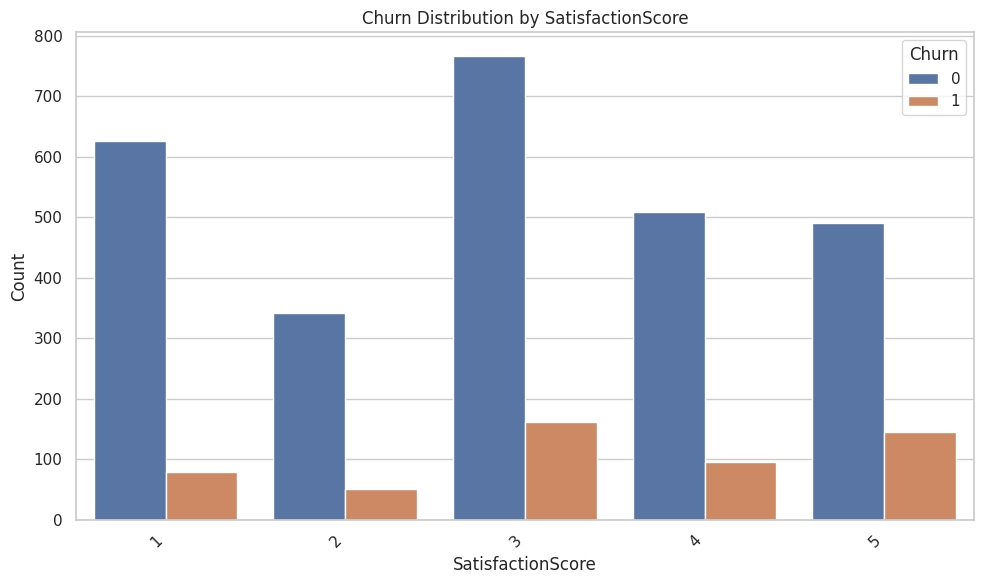

In [44]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(data=df, x='SatisfactionScore', hue='Churn')
plt.title('Churn Distribution by SatisfactionScore')
plt.xlabel('SatisfactionScore')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

#### <b>NumberOfAddress
Total number of added on a particular customer.

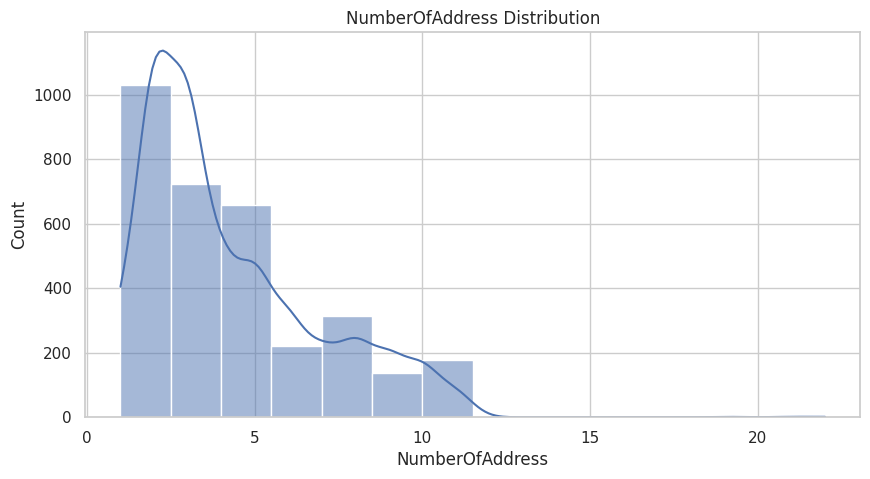

In [45]:
plot_histogram(df, 'NumberOfAddress')

In [46]:
NumberOfAddress_counts = counts_bottom_n(df, 'NumberOfAddress', 10)
NumberOfAddress_counts

,NumberOfAddress,count
11,19,1
12,22,1
13,21,1
10,11,60
9,10,118
8,9,137
7,7,145
6,8,169
5,6,220
4,1,224


In [47]:
df = df[~df['NumberOfAddress'].isin(NumberOfAddress_counts[NumberOfAddress_counts['count'] == 1]['NumberOfAddress'])]

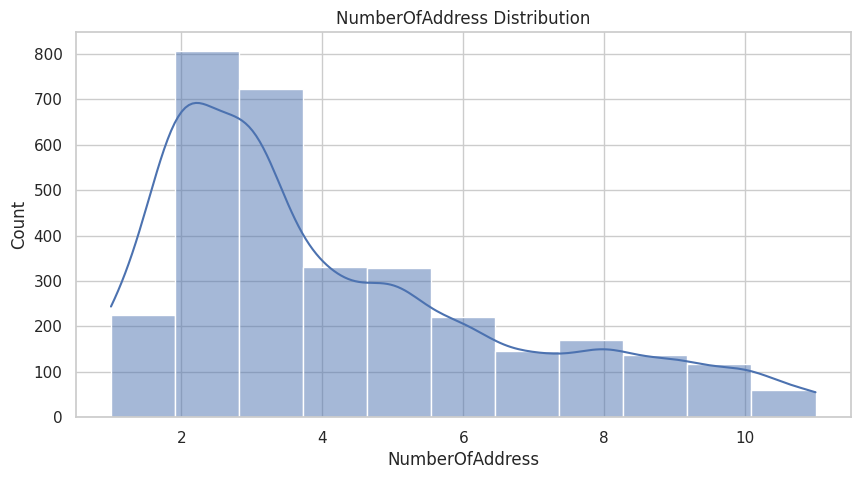

In [48]:
plot_histogram(df, 'NumberOfAddress')

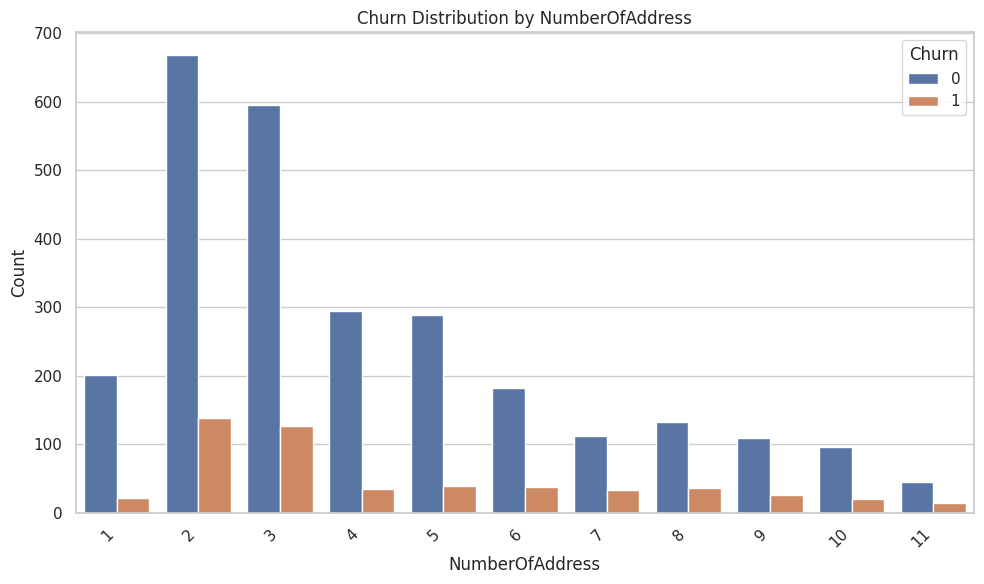

In [49]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(data=df, x='NumberOfAddress', hue='Churn')
plt.title('Churn Distribution by NumberOfAddress')
plt.xlabel('NumberOfAddress')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

#### <b>Complain
Any complaint has been raised in the last month.

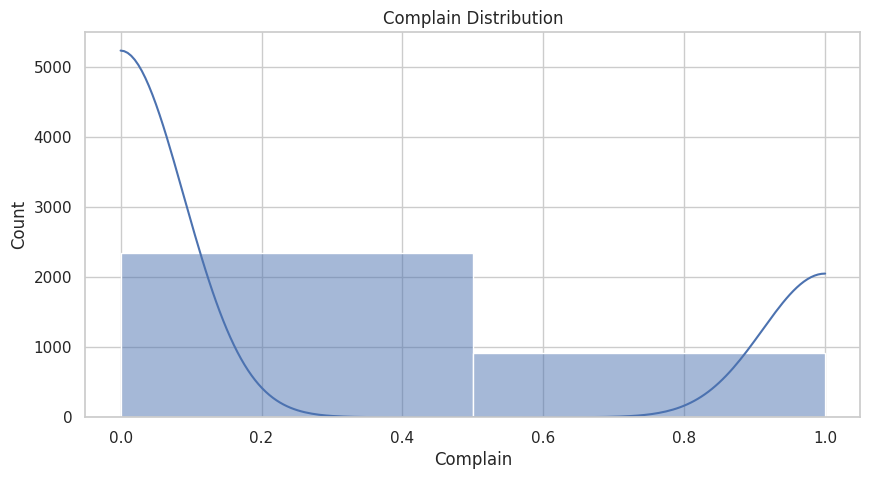

In [50]:
plot_histogram(df, 'Complain')

In [51]:
df['Complain'].value_counts().reset_index()

,Complain,count
0,0,2343
1,1,918


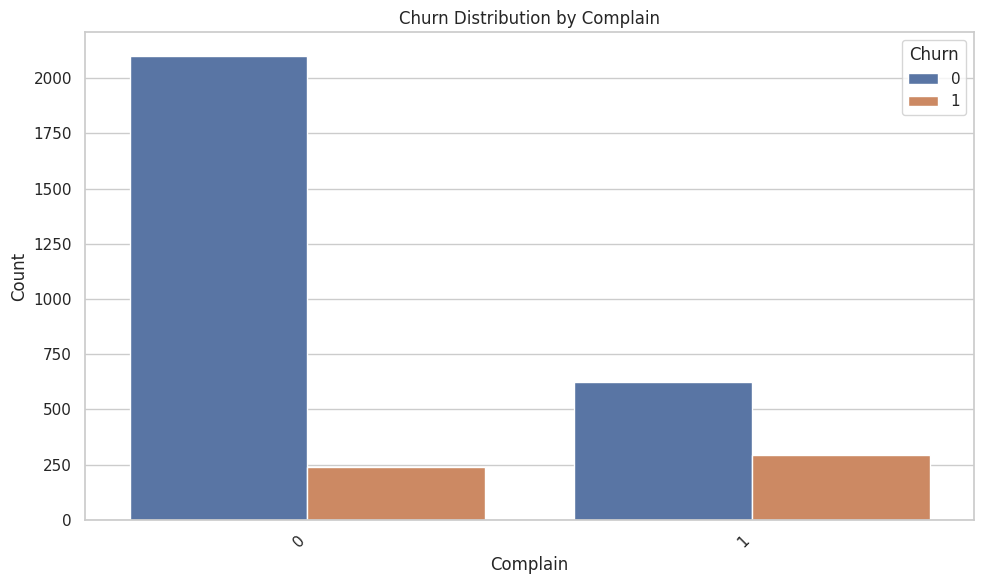

In [52]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
sns.countplot(data=df, x='Complain', hue='Churn')
plt.title('Churn Distribution by Complain')
plt.xlabel('Complain')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

#### <b>DaySinceLastOrder
Day since last order by customer.

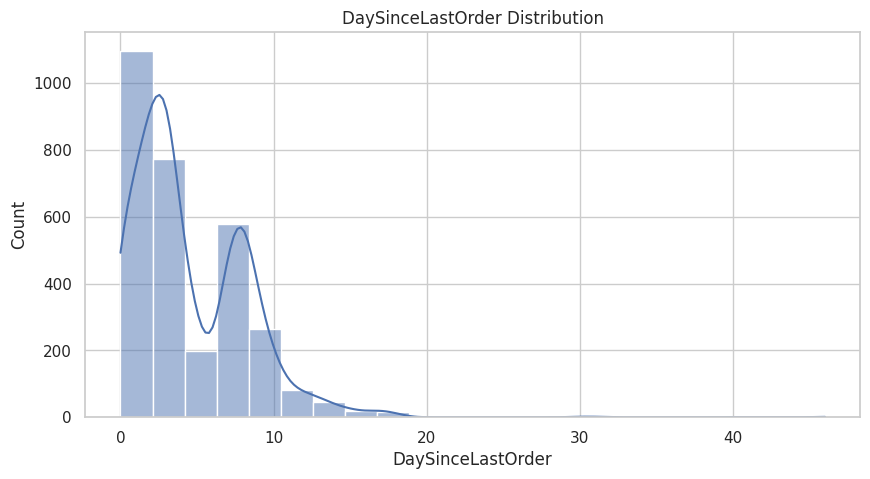

In [53]:
plot_histogram(df, 'DaySinceLastOrder')

In [54]:
DaySinceLastOrder_counts = counts_bottom_n(df, 'DaySinceLastOrder', 10)
DaySinceLastOrder_counts

,DaySinceLastOrder,count
21,31.0,1
19,30.0,1
20,46.0,1
18,18.0,6
17,16.0,8
16,17.0,11
15,15.0,12
14,14.0,18
13,13.0,29
12,12.0,36


In [55]:
df = df[~df['DaySinceLastOrder'].isin(DaySinceLastOrder_counts[DaySinceLastOrder_counts['count'] == 1]['DaySinceLastOrder'])]

In [56]:
df[df['DaySinceLastOrder'].isna()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
29,1.0,17.0,5,Fashion,5,Married,11,0,NaN,228.06,1
52,16.0,9.0,4,Fashion,1,Married,4,1,NaN,226.24,0
...,...,...,...,...,...,...,...,...,...,...,...
3771,22.0,13.0,4,Fashion,3,Single,9,0,NaN,209.65,0
3836,28.0,8.0,4,Fashion,3,Married,9,0,NaN,230.02,0
3843,13.0,7.0,2,Fashion,1,Married,2,0,NaN,221.13,0
3894,9.0,24.0,4,Laptop & Accessory,5,Divorced,5,1,NaN,214.66,0


In [57]:
count_nulls_by_group(df, 'PreferedOrderCat', 'DaySinceLastOrder')

,PreferedOrderCat,count
0,Fashion,138
1,Grocery,12
2,Laptop & Accessory,31


In [58]:
DaySinceLastOrder_stats = generate_stats(df, 'DaySinceLastOrder', ['PreferedOrderCat', 'Churn'])
DaySinceLastOrder_stats

,PreferedOrderCat,Churn,DaySinceLastOrder Median,Count,Percentage
0,Fashion,0,7.0,293,60.66
1,Fashion,1,7.0,52,10.77
2,Grocery,0,7.0,219,91.63
3,Grocery,1,8.5,8,3.35
4,Laptop & Accessory,0,4.0,1065,88.09
5,Laptop & Accessory,1,3.0,113,9.35
6,Mobile Phone,0,3.0,861,73.09
7,Mobile Phone,1,2.0,317,26.91
8,Others,0,7.5,138,92.62
9,Others,1,9.0,11,7.38


In [59]:
df = fill_missing_value(df, 'DaySinceLastOrder', DaySinceLastOrder_stats, ['PreferedOrderCat', 'Churn'], 'DaySinceLastOrder Median')

In [60]:
df.duplicated().sum()

0

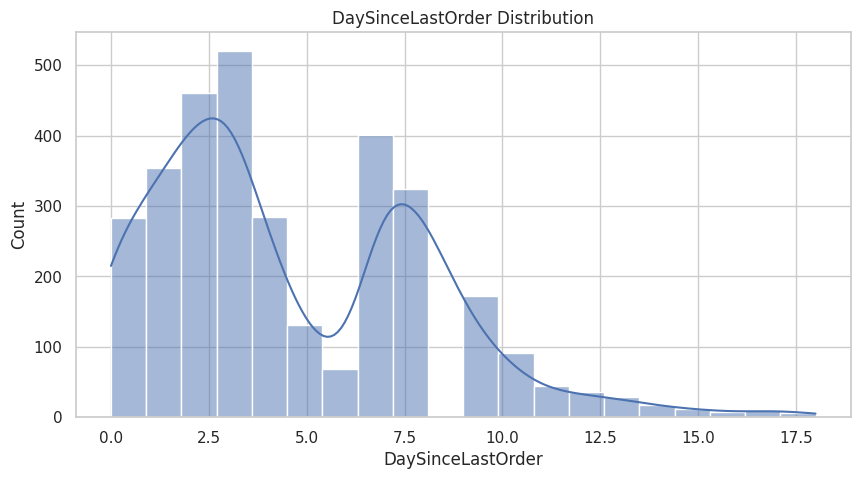

In [61]:
plot_histogram(df, 'DaySinceLastOrder')

#### <b>CashbackAmount
Average cashback in last month

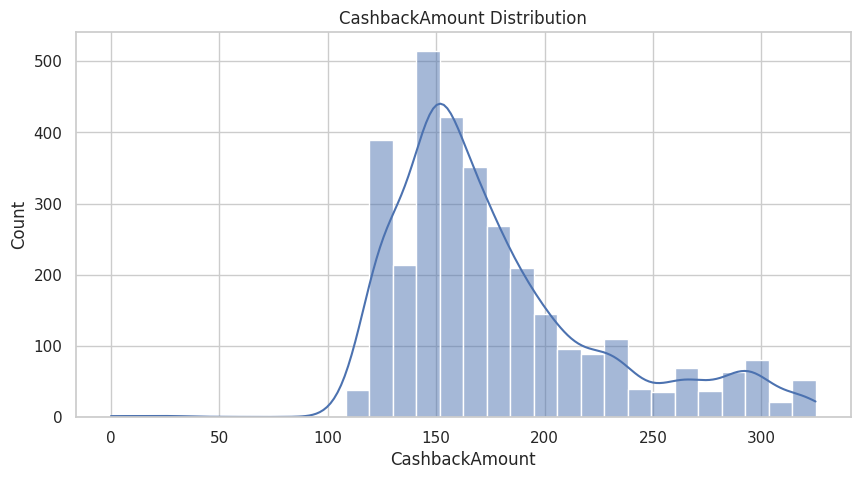

In [62]:
plot_histogram(df, 'CashbackAmount')

In [63]:
df[df['CashbackAmount'] < 100].value_counts().reset_index()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,count
0,0.0,12.0,3,Mobile Phone,1,Married,2,1,2.0,56.0,0,1
1,1.0,13.0,4,Mobile Phone,1,Married,3,1,3.0,81.0,0,1
2,1.0,33.0,5,Laptop & Accessory,5,Married,1,0,0.0,0.0,0,1
3,2.0,34.0,6,Laptop & Accessory,5,Married,2,0,1.0,25.0,0,1
4,6.0,21.0,3,Laptop & Accessory,1,Married,1,1,1.0,12.0,0,1
5,7.0,22.0,4,Laptop & Accessory,1,Married,2,1,2.0,37.0,0,1
6,8.0,24.0,3,Laptop & Accessory,5,Married,1,0,4.0,0.0,0,1
7,9.0,25.0,4,Laptop & Accessory,5,Married,2,0,5.0,25.0,0,1
8,10.0,10.0,3,Mobile Phone,2,Married,5,0,8.0,0.0,0,1
9,11.0,11.0,4,Mobile Phone,2,Married,6,0,9.0,25.0,0,1


In [64]:
df = df[df['CashbackAmount'] > 110]

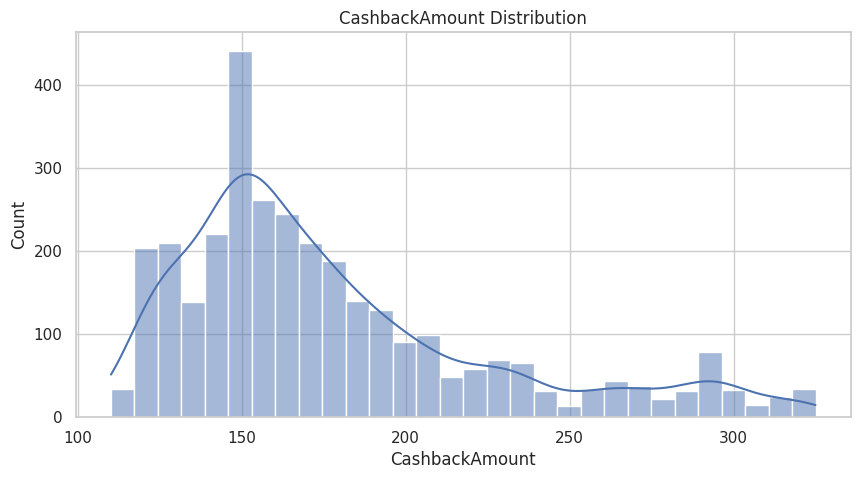

In [65]:
plot_histogram(df, 'CashbackAmount')

#### <b>Churn
Churn flag.

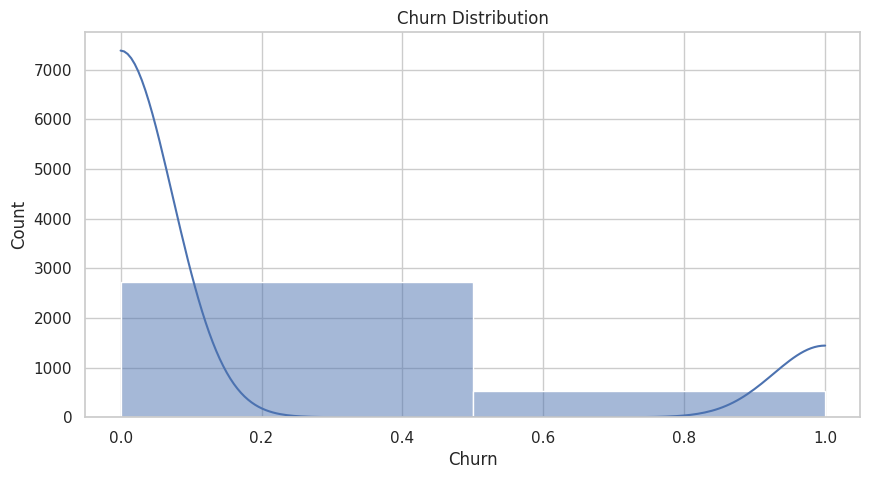

In [66]:
plot_histogram(df, 'Churn')

In [67]:
num = df.select_dtypes(include=[np.number]).columns
num = num.drop('Churn')
num

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount'],
      dtype='object')

In [68]:
df.duplicated().sum()

0

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df.shape

(3248, 11)

In [71]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y)

In [72]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

# <b>4. Modeling

## <b>4.1. Model-Business Explanation

In [73]:
total_customer = len(df)
total_retained = len(df[df['Churn'] == 0])
total_churned = len(df[df['Churn'] == 1])

print("Total Customers are: ", total_customer)
print("Total Retained Customers are: ", total_retained)
print("Total Churned Customers are: ", total_churned)
print("Churn Rate is: ", round(total_churned / total_customer * 100, 2), "(%)")

Total Customers are:  3248
Total Retained Customers are:  2717
Total Churned Customers are:  531
Churn Rate is:  16.35 (%)


The core objective of the predictive model is to accurately forecast customer churn, allowing Treepedia to proactively implement retention strategies and minimize financial losses. The model aims to strike a balance between identifying customers at high risk of churn (minimizing false negatives) while avoiding unnecessary marketing expenditures on customers unlikely to churn (minimizing false positives).

**4.1.1. Key Assumptions:**

* **Average Customer Lifetime Value (CLTV):** $500 (based on average customer lifetime value in e-commerce)

* **Marketing Budget:** 13.6% of total revenue from retained customers (this represents the maximum budget available for retention initiatives)

* **Marketing Cost per Customer (If all retained customers are targeted):** \$68 (calculated as $184,756 / 2717 retained customers)

**4.1.2. Financial Impact**

* **True Positive (TP):** The model correctly predicts churn, resulting in a potential saving of \$432 per customer (\$500 CLTV - \$68 marketing cost).  *This represents revenue preserved by successfully retaining the customer through targeted interventions.*

* **True Negative (TN):** The model correctly predicts no churn, allowing the company to retain the full customer value of $500. *This represents revenue from customers who remain loyal without needing additional retention efforts.*

* **False Positive (FP):** The model incorrectly predicts churn, leading to an unnecessary marketing cost of $68 per customer. *This represents wasted resources on customers who wouldn't have churned regardless.*

* **False Negative (FN):** The model incorrectly predicts no churn, resulting in a revenue loss of $500 per customer. *This is the most significant cost, as the company misses the opportunity to intervene and potentially retain the customer.*

**4.1.3. Financial Impact Without Modeling (Baseline)**

Based on a historical churn rate of 16.35%, without the model, Treepedia would incur:

* **Total Customers:** 3,248
* **Churn Rate:** 16.35%
* **Total Churn:** 531 customers
* **Total Revenue Loss:** 531 customers * \$500 = $265,500

**4.1.4. Financial Impact with Perfect Model (100% Recall & Precision)**

With a model achieving 100% recall (no false negatives) and 100% precision (no false positives), Treepedia would:

* **Correctly Predict Churn (TP):** 531 customers

* **Correctly Predict No Churn (TN):** 2,717 customers

* **Revenue Loss Due to Churn (FN):** $0 (all churned customers are correctly identified)

* **Cost of False Positives (FP):** $0 (no customers are incorrectly predicted to churn)

* **Revenue Saved from True Positives (TP):** 531 customers * \$432 = $229,392

* **Revenue from True Negatives (TN):** 2,717 customers * \$500 = $1,358,500

* **Total Revenue with Model:** \$229,392 + \$1,358,500 = $1,587,892

* **Net Revenue Increase with Model:** \$1,587,892 - \$1,358,500 = $229,392

In [74]:
avg_customer_value = 500
marketing_cost = 68

total_customers = 3248
churn_rate = 0.1635
total_churned = int(total_customers * churn_rate)
total_retained = total_customers - total_churned

# Calculate Revenue and Costs
revenue_retained = total_retained * avg_customer_value
revenue_loss_churn = total_churned * avg_customer_value
total_revenue_without_model = revenue_retained  # Revenue if no intervention is made (only retained customers generate revenue)
potential_loss_marketing = total_churned * marketing_cost

# Perfect Model Scenario
revenue_saved_tp = total_churned * (avg_customer_value - marketing_cost)  # Revenue saved by retaining churned customers
total_revenue_with_model = total_revenue_without_model + revenue_saved_tp
profit_increase = total_revenue_with_model - total_revenue_without_model

# Print Results
print("Average Customer Value is: $", avg_customer_value)
print("Total Revenue from Retained Customers (Without Model): $", revenue_retained)
print("Total Revenue Loss Due to Churn (Without Model): $", revenue_loss_churn)
print("Total Revenue with Perfect Model: $", total_revenue_with_model)
print("Net Revenue Increase with Perfect Model: $", profit_increase)


Average Customer Value is: $ 500
Total Revenue from Retained Customers (Without Model): $ 1358500
Total Revenue Loss Due to Churn (Without Model): $ 265500
Total Revenue with Perfect Model: $ 1587892
Net Revenue Increase with Perfect Model: $ 229392


**Conclusion:**

A perfect model would eliminate all revenue loss due to churn and prevent unnecessary marketing costs, resulting in a substantial increase in profit. While achieving 100% recall and precision is unlikely in practice, this analysis highlights the significant financial benefits that a highly accurate churn prediction model can deliver for Treepedia.









## <b>4.2. Benchmark Model

In [75]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42)]

resamplers = [
    RandomOverSampler(random_state=42),
    RandomUnderSampler(random_state=42),
]

model_results = []

test_churned = len(y_test[y_test == 1])
test_retained = len(y_test[y_test == 0])
loss_without_model = test_churned * avg_customer_value
revenue_without_model = test_retained * avg_customer_value
profit_without_model = revenue_without_model - loss_without_model

In [76]:
# With using the model
def loss_profit(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()

    # Using the model
    loss_with_model = (FN * avg_customer_value) + ((TP + FP) * marketing_cost)
    revenue_with_model = (TP + TN) * avg_customer_value
    profit_with_model = revenue_with_model - loss_with_model

    # Calculate percentage differences
    loss_diff_percentage = ((loss_with_model - loss_without_model) / loss_without_model) * 100
    profit_diff_percentage = ((profit_with_model - profit_without_model) / profit_without_model) * 100

    return loss_with_model, profit_with_model, loss_diff_percentage, profit_diff_percentage

def loss(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()

    # Using the model
    loss_with_model = (FN * avg_customer_value) + ((TP + FP) * marketing_cost)

    return loss_with_model

def profit(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()

    # Using the model
    loss_with_model = (FN * avg_customer_value) + ((TP + FP) * marketing_cost)
    revenue_with_model = (TP + TN) * avg_customer_value
    profit_with_model = revenue_with_model - loss_with_model

    return profit_with_model

loss_scorer = make_scorer(
    loss,
    greater_is_better=False,
    needs_proba=False,
    needs_threshold=False)

profit_scorer = make_scorer(
    profit,
    greater_is_better=True,
    needs_proba=False,
    needs_threshold=False)

In [77]:
# Define column transformer
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat)
], remainder='passthrough')

# Iterate through models and resamplers
for model in models:
    model_name = model.__class__.__name__
    for resampler in resamplers:
        # Create a pipeline
        pipe = ImbPipeline([
            ('preprocessor', preprocessor),
            ('resampler', resampler),
            ('model', model)
        ])

        # Perform cross-validation
        train_accuracy_cv = cross_val_score(pipe, X_train, y_train, cv=skf, scoring='accuracy').mean()
        train_recall_cv = cross_val_score(pipe, X_train, y_train, cv=skf, scoring='recall').mean()
        train_precision_cv = cross_val_score(pipe, X_train, y_train, cv=skf, scoring='precision').mean()
        train_f1_cv = cross_val_score(pipe, X_train, y_train, cv=skf, scoring='f1').mean()

        # Fit the pipeline on the full training set and predict on the test set
        pipe.fit(X_train, y_train)
        y_test_pred = pipe.predict(X_test)

        # Calculate cost and revenue
        loss_with_model, profit_with_model, loss_diff_percentage, profit_diff_percentage = loss_profit(y_test, y_test_pred)

        # Collect scores and metrics
        metrics = {
            "Train Accuracy": train_accuracy_cv,
            "Accuracy": accuracy_score(y_test, y_test_pred),
            "Train Recall": train_recall_cv,
            "Recall": recall_score(y_test, y_test_pred),
            "Train Precision": train_precision_cv,
            "Precision": precision_score(y_test, y_test_pred),
            "Train F1": train_f1_cv,
            "F1": f1_score(y_test, y_test_pred),
            "Loss": loss_with_model,
            "Profit": profit_with_model,
            "Loss Diff (%)": loss_diff_percentage,
            "Profit Diff (%)": profit_diff_percentage,
        }

        # Append model information
        model_results.append({
            "Model": model_name,
            "Resampler": resampler.__class__.__name__,
            **metrics
        })

# Convert result to a DataFrame
models_df = pd.DataFrame(model_results)

In [78]:
models_df.sort_values(by='Profit Diff (%)', ascending=False).round(3)

,Model,Resampler,Train Accuracy,Accuracy,Train Recall,Recall,Train Precision,Precision,Train F1,F1,Loss,Profit,Loss Diff (%),Profit Diff (%)
8,XGBClassifier,RandomOverSampler,0.923,0.934,0.729,0.868,0.785,0.760,0.755,0.811,15228,288272,-71.268,31.631
2,RandomForestClassifier,RandomOverSampler,0.926,0.932,0.720,0.811,0.809,0.782,0.760,0.796,17480,285520,-67.019,30.374
0,DecisionTreeClassifier,RandomOverSampler,0.890,0.922,0.645,0.764,0.676,0.757,0.658,0.761,19776,279724,-62.687,27.728
6,GradientBoostingClassifier,RandomOverSampler,0.883,0.888,0.812,0.887,0.608,0.606,0.695,0.720,16540,271960,-68.792,24.183
3,RandomForestClassifier,RandomUnderSampler,0.857,0.862,0.854,0.906,0.540,0.545,0.661,0.681,16968,263032,-67.985,20.106
9,XGBClassifier,RandomUnderSampler,0.857,0.855,0.871,0.906,0.540,0.533,0.666,0.671,17240,260760,-67.472,19.068
7,GradientBoostingClassifier,RandomUnderSampler,0.847,0.855,0.845,0.868,0.520,0.535,0.643,0.662,18696,259304,-64.725,18.404
4,AdaBoostClassifier,RandomOverSampler,0.841,0.843,0.805,0.830,0.508,0.512,0.623,0.633,20696,253304,-60.951,15.664
1,DecisionTreeClassifier,RandomUnderSampler,0.786,0.832,0.821,0.877,0.422,0.492,0.557,0.631,19352,251148,-63.487,14.679
5,AdaBoostClassifier,RandomUnderSampler,0.813,0.823,0.816,0.877,0.460,0.477,0.588,0.618,19760,247740,-62.717,13.123


## <b>4.3. Train and Test the Base Model

In [79]:
# Create a pipeline
xgb_model = ImbPipeline([
    ('preprocessor', preprocessor),
    ('resampler', RandomOverSampler(random_state=42)),
    ('model', XGBClassifier(random_state=42))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb_model = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb_model))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       544
           1       0.76      0.87      0.81       106

    accuracy                           0.93       650
   macro avg       0.87      0.91      0.89       650
weighted avg       0.94      0.93      0.94       650



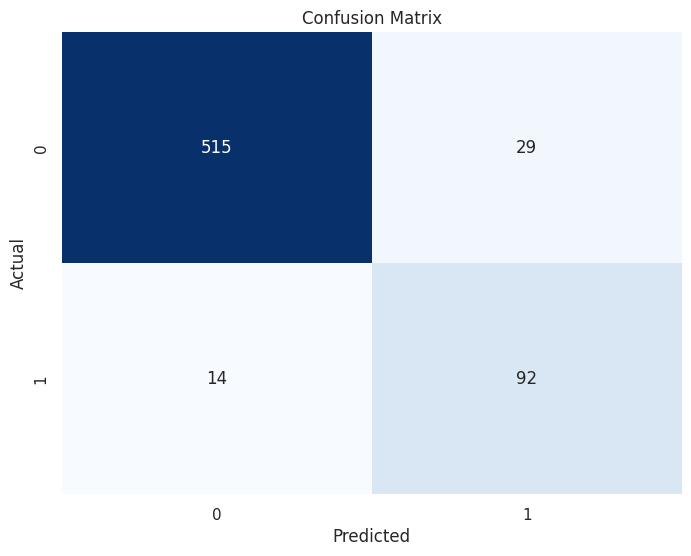

In [80]:
cm = confusion_matrix(y_test, y_pred_xgb_model)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
def check_overfitting(model):
    # Calculate metrics on training set using cross-validation
    train_accuracy_cv = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy').mean()
    train_recall_cv = cross_val_score(model, X_train, y_train, cv=skf, scoring='recall').mean()
    train_precision_cv = cross_val_score(model, X_train, y_train, cv=skf, scoring='precision').mean()
    train_f1_cv = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1').mean()

    # Fit the model on the whole training set before evaluating on the test set
    model.fit(X_train, y_train)

    # Calculate metrics on test set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Create a DataFrame for comparison
    metrics_df = pd.DataFrame({
        'Metric': ['Accucary', 'Recall', 'Precision', 'F1-Score'],
        'Train_CV': [train_accuracy_cv, train_recall_cv, train_precision_cv, train_f1_cv],
        'Test': [test_accuracy, test_recall, test_precision, test_f1]
    })

    # Calculate percentage difference
    metrics_df['Difference (%)'] = ((metrics_df['Train_CV'] - metrics_df['Test']) / metrics_df['Train_CV']) * 100
    metrics_df = metrics_df.round(3)

    # Display the DataFrame
    display(metrics_df)

    # Check for overfitting (10% difference threshold)
    overfitting = any(abs(metrics_df['Difference (%)']) >= 10 )

    if overfitting:
        print("\nModel might be overfitting. Consider regularization or other techniques.")
    else:
        print("\nModel does not show signs of significant overfitting based on the 10% threshold.")

In [82]:
check_overfitting(xgb_model)

,Metric,Train_CV,Test,Difference (%)
0,Accucary,0.923,0.934,-1.215
1,Recall,0.729,0.868,-18.990
2,Precision,0.785,0.760,3.161
3,F1-Score,0.755,0.811,-7.416



Model might be overfitting. Consider regularization or other techniques.


In [83]:
def loss_profit_diff(y_true, y_pred):
    loss_with_model, profit_with_model, loss_diff_percentage, profit_diff_percentage = loss_profit(y_true, y_pred)

    # Print the results with percentage differences
    print(f"Without the Model - Total Loss: ${loss_without_model:.3f}")
    print(f"Using the Model - Total Loss: ${loss_with_model:.3f} ({loss_diff_percentage:.3f}% {'decrease' if loss_diff_percentage < 0 else 'increase'} compared to no model)")
    print()
    print(f"Without the Model - Total Profit: ${profit_without_model:.3f}")
    print(f"Using the Model - Total Profit: ${profit_with_model:.3f} ({profit_diff_percentage:.3f}% {'increase' if profit_diff_percentage > 0 else 'decrease'} compared to no model)")


In [84]:
loss_profit_diff(y_test, y_pred_xgb_model)

Without the Model - Total Loss: $53000.000
Using the Model - Total Loss: $15228.000 (-71.268% decrease compared to no model)

Without the Model - Total Profit: $219000.000
Using the Model - Total Profit: $288272.000 (31.631% increase compared to no model)


## <b>4.4. Hyperparameter Tuning

In [85]:
# XGB Hyperparameter
xgb_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__reg_alpha': [0, 0.1, 1],
    'model__reg_lambda': [1, 1.5, 2]
}

In [86]:
xgb_grid = GridSearchCV(
    xgb_model,
    xgb_params,
    scoring=profit_scorer,
    cv=skf,
    n_jobs=-1)

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['PreferedOrderCat', 'MaritalStatus'], dtype='object'))])),
                                       ('resampler',
                                        RandomOverSampler(random_state=42)),
                                       ('model',
                                        XGBClassi...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'model__colsample_bytree': [0.6, 0.8, 1.0],
                         'model__learning_rate': [0.01, 0.05, 0.1],
                         'model__max_depth': [3, 5, 7],
                         'model__n_estimators': [100, 200, 300],
                         'model__reg_alpha': [0, 0.1, 1],
                         'model__reg_lambda': [1, 1.5, 2],
                         'model__subsample': [0.6, 0.8, 1.0]},
             scoring=make_scorer(profit))

In [87]:
# print('Random Forest Classifier')
# print(f'Best Score: {grid_xgb.best_score_}')
print('\nBest Params:')
xgb_grid.best_params_


Best Params:


{'model__colsample_bytree': 0.8,
 'model__learning_rate': 0.05,
 'model__max_depth': 7,
 'model__n_estimators': 300,
 'model__reg_alpha': 0.1,
 'model__reg_lambda': 1,
 'model__subsample': 0.8}

In [91]:
best_params = {
'colsample_bytree': 0.8,
'learning_rate': 0.05,
'max_depth': 7,  # Indentation fixed here
'n_estimators': 300,
'reg_alpha': 0.1,
'reg_lambda': 1,
'subsample': 0.8
}

In [92]:
xgb_tuning = xgb_grid.best_estimator_

y_pred_xgb_tuning = xgb_tuning.predict(X_test)
print(classification_report(y_test, y_pred_xgb_tuning))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       544
           1       0.77      0.85      0.81       106

    accuracy                           0.93       650
   macro avg       0.87      0.90      0.88       650
weighted avg       0.94      0.93      0.94       650



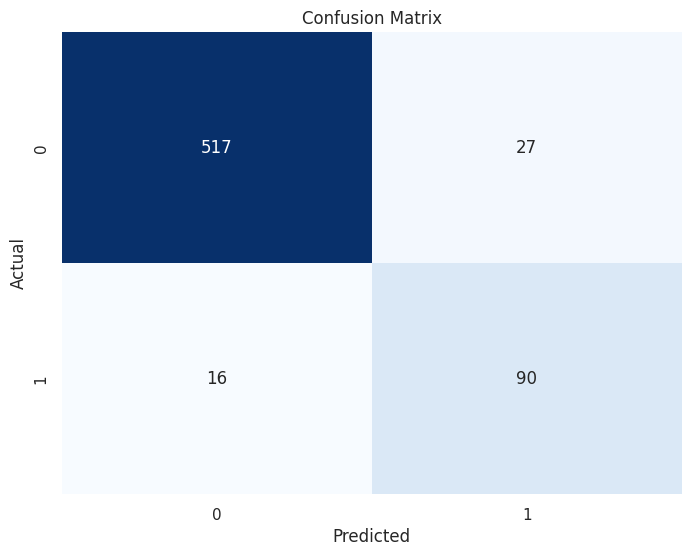

In [93]:
cm = confusion_matrix(y_test, y_pred_xgb_tuning)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [95]:
check_overfitting(xgb_tuning)

,Metric,Train_CV,Test,Difference (%)
0,Accucary,0.934,0.934,-0.005
1,Recall,0.784,0.849,-8.363
2,Precision,0.808,0.769,4.766
3,F1-Score,0.794,0.807,-1.604



Model does not show signs of significant overfitting based on the 10% threshold.


In [96]:
loss_profit_diff(y_test, y_pred_xgb_tuning)

Without the Model - Total Loss: $53000.000
Using the Model - Total Loss: $15956.000 (-69.894% decrease compared to no model)

Without the Model - Total Profit: $219000.000
Using the Model - Total Profit: $287544.000 (31.299% increase compared to no model)


# <b> 5. Model Finalization and Explanation

## <b>5.1. Final Model - XGBoost

In [106]:
# Create a pipeline
xgb_model = ImbPipeline([
    ('preprocessor', preprocessor),
    ('resampler', RandomOverSampler(random_state=42)),
    ('model', XGBClassifier(
        colsample_bytree=0.8,
        learning_rate = 0.05,
        max_depth = 7,
        n_estimators = 300,
        reg_alpha = 0.1,
        reg_lambda = 1,
        subsample = 0.8,
        random_state=42))
])

train_accuracy_cv = cross_val_score(xgb_model, X_train, y_train, cv=skf, scoring='accuracy').mean()
train_recall_cv = cross_val_score(xgb_model, X_train, y_train, cv=skf, scoring='recall').mean()
train_precision_cv = cross_val_score(xgb_model, X_train, y_train, cv=skf, scoring='precision').mean()
train_f1_cv = cross_val_score(xgb_model, X_train, y_train, cv=skf, scoring='f1').mean()

xgb_model.fit(X_train, y_train)
y_pred_xgb_model = xgb_model.predict(X_test)

loss_with_model, profit_with_model, loss_diff_percentage, profit_diff_percentage = loss_profit(y_test, y_pred_xgb_model)

# Collect scores and metrics
metrics = {
    "Train Accuracy": train_accuracy_cv,
    "Accuracy": accuracy_score(y_test, y_pred_xgb_model),
    "Train Recall": train_recall_cv,
    "Recall": recall_score(y_test, y_pred_xgb_model),
    "Train Precision": train_precision_cv,
    "Precision": precision_score(y_test, y_pred_xgb_model),
    "Train F1": train_f1_cv,
    "F1": f1_score(y_test, y_pred_xgb_model),
    "Loss": loss_with_model,
    "Profit": profit_with_model,
    "Loss Diff (%)": loss_diff_percentage,
    "Profit Diff (%)": profit_diff_percentage,
}

final_result = []

# Append model information
final_result.append({
    "Model": model_name,
    "Resampler": resampler.__class__.__name__,
    **metrics
})

# Convert result to a DataFrame
final_models_df = pd.DataFrame(final_result)

In [107]:
final_models_df.round(3).T

,0
Model,XGBClassifier
Resampler,RandomUnderSampler
Train Accuracy,0.934
Accuracy,0.934
Train Recall,0.784
Recall,0.849
Train Precision,0.808
Precision,0.769
Train F1,0.794
F1,0.807


In [108]:
print(classification_report(y_test, y_pred_xgb_model))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       544
           1       0.77      0.85      0.81       106

    accuracy                           0.93       650
   macro avg       0.87      0.90      0.88       650
weighted avg       0.94      0.93      0.94       650



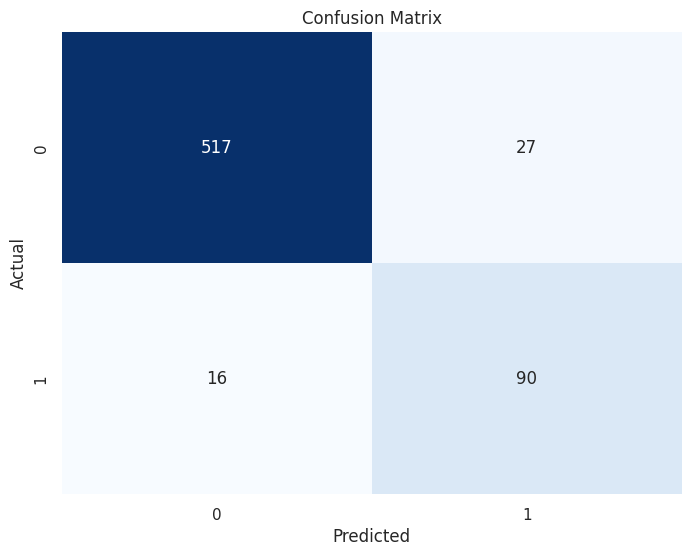

In [109]:
cm = confusion_matrix(y_test, y_pred_xgb_model)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [110]:
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

## <b>5.2. How XGBoost Works

XGBoost is an implementation of gradient-boosted decision trees designed for speed and performance. It operates by iteratively adding new models to correct errors made by existing models, combining the predictions from multiple weak learners to form a strong learner. The model's output is a probability score between 0 and 1, representing the likelihood of a customer churning.

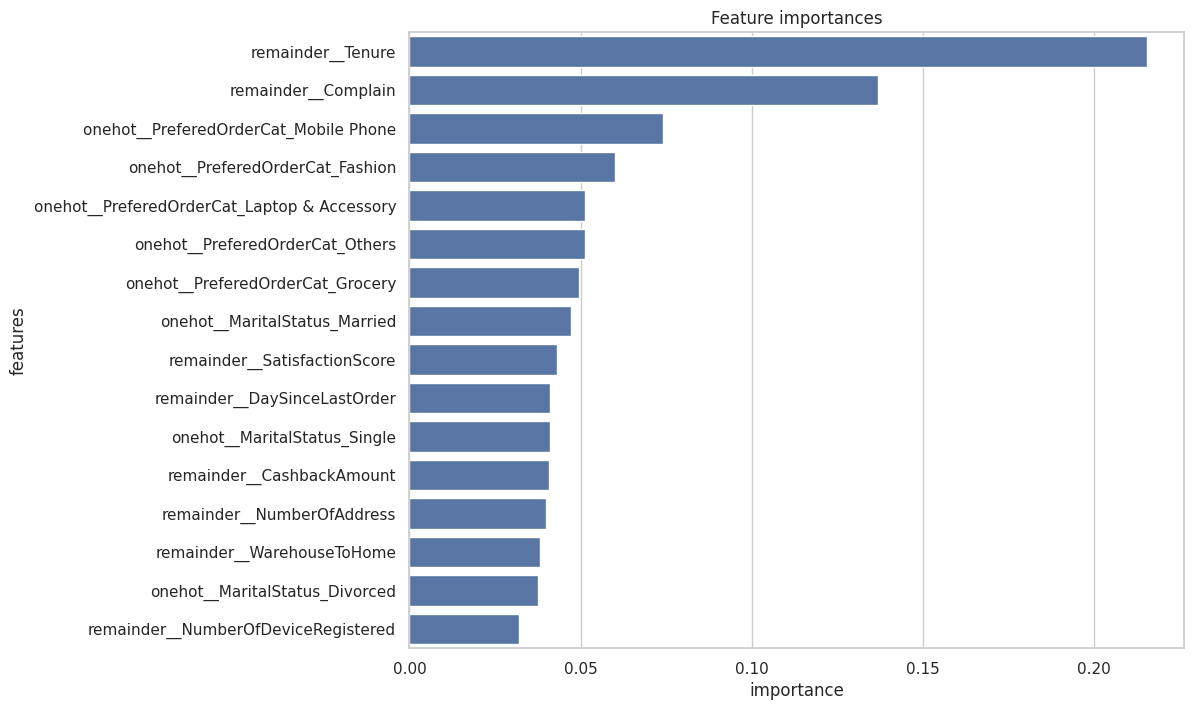

In [111]:
# Assuming 'pipe' is the fitted pipeline object you want to extract feature importances from
feature_importance = pd.DataFrame(xgb_tuning[2].feature_importances_, columns=['importance']) # Access the model within the pipeline using index 2

# Get feature names after transformations
feature_names = xgb_tuning[:-1].get_feature_names_out()  # Exclude the last step (the model)
feature_importance['features'] = feature_names  # Use transformed feature names

plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='features', data=feature_importance.sort_values(by='importance', ascending=False))
plt.title('Feature importances')
plt.show()

**Interpretation of Feature Importances**

The feature importance scores provided by XGBoost represent the relative importance of each feature in the model. These scores indicate how useful each feature is in predicting the target variable, in this case, the likelihood of a customer churning.
- **High Importance Scores:**
Features with higher scores have a greater impact on the model's predictions. These are the most influential features in determining whether a customer will churn.
- **Low Importance Scores:** Features with lower scores have less influence on the model's predictions. These may be less relevant in the context of predicting churn.

Below is feature importance scores:

In [120]:
# Extract the fitted XGBoost model from the pipeline
model = xgb_model[-1]

# Get feature names after transformations (excluding the model step)
feature_names = xgb_model[:-1].get_feature_names_out()

# Extract the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display the feature names and their importances
importance = pd.DataFrame({
    'Feature': feature_names,  # Use transformed feature names
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importance

,Feature,Importance
8,remainder__Tenure,0.215627
13,remainder__Complain,0.136767
3,onehot__PreferedOrderCat_Mobile Phone,0.073963
0,onehot__PreferedOrderCat_Fashion,0.059942
2,onehot__PreferedOrderCat_Laptop & Accessory,0.051391
4,onehot__PreferedOrderCat_Others,0.051255
1,onehot__PreferedOrderCat_Grocery,0.049604
6,onehot__MaritalStatus_Married,0.047197
11,remainder__SatisfactionScore,0.043116
14,remainder__DaySinceLastOrder,0.041210


Next, we use some hypothetical feature values to calculate the predicted probability of customer churn.

## <b>5.3. Model Prediction

In [122]:
# Try to predict the original dataset
test = df.loc[:4].copy()

predictions = xgb_model.predict(test)
probabilities = xgb_model.predict_proba(test)[:, 1]
test['Predictions'] = predictions
test['Probabilities'] = probabilities
test

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,Predictions,Probabilities
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0,0,0.002709
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0,0,0.006099
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0,0,0.000538
3,20.0,25.0,4,Fashion,3,Divorced,7,0,7.0,230.27,0,0,0.014053
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0,0,0.003205


In [123]:
new_data = pd.DataFrame({
    'Tenure': [12.0, 1],
    'WarehouseToHome': [26, 5],
    'NumberOfDeviceRegistered': [3, 4],
    'PreferedOrderCat': ['Fashion', 'Mobile Phone'],
    'SatisfactionScore': [4, 5],
    'MaritalStatus': ['Married', 'Single'],
    'NumberOfAddress': [3, 2],
    'Complain': [1, 0],
    'DaySinceLastOrder': [8, 10],
    'CashbackAmount': [155.22, 140.15]
})

predictions = xgb_model.predict(new_data)
probabilities = xgb_model.predict_proba(new_data)[:, 1]

new_data['Predictions'] = predictions
new_data['Probabilities'] = probabilities
new_data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Predictions,Probabilities
0,12.0,26,3,Fashion,4,Married,3,1,8,155.22,0,0.023977
1,1.0,5,4,Mobile Phone,5,Single,2,0,10,140.15,1,0.797743


**Summary**

- The `Probabilities` column shows the predicted probability of the positive class (customer churn).

  - **High probabilities (close to 1)** indicate that our model is very confident in its predictions that these customers will churn.
  - **Low probabilities (close to 0)** suggest a low likelihood of churn.

- The model exhibits strong confidence in its predictions, as indicated by the high probabilities assigned to each instance (e.g., a probability of 0.798 means a 79.8% likelihood of churn).

- These results suggest that our model identifies instances with a high likelihood of churn, enabling us to potentially anticipate and mitigate such occurrences proactively.

## <b>5.4. Evaluate XGBoost

### <b>5.4.1. ROC Curve

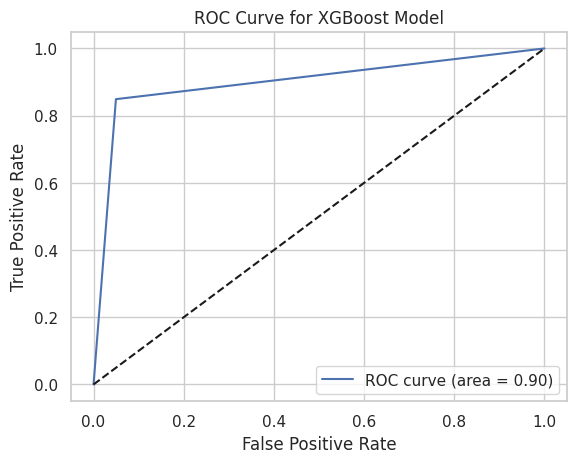

AUC: 0.8997121254162043


In [126]:
# Compute ROC curve and AUC
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb_model)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_model)

# Plot ROC curve
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend(loc="lower right")
plt.show()

print("AUC:", roc_auc_xgb)


**Summary:**

The AUC score summarizes the model’s performance across all classification thresholds. A higher AUC indicates better model performance in distinguishing between positive and negative cases. With an AUC score of 0.90, our XGBoost model demonstrates excellent performance, highlighting its strong capability to accurately predict customer churn.








### <b>5.4.2. Permutation Importance

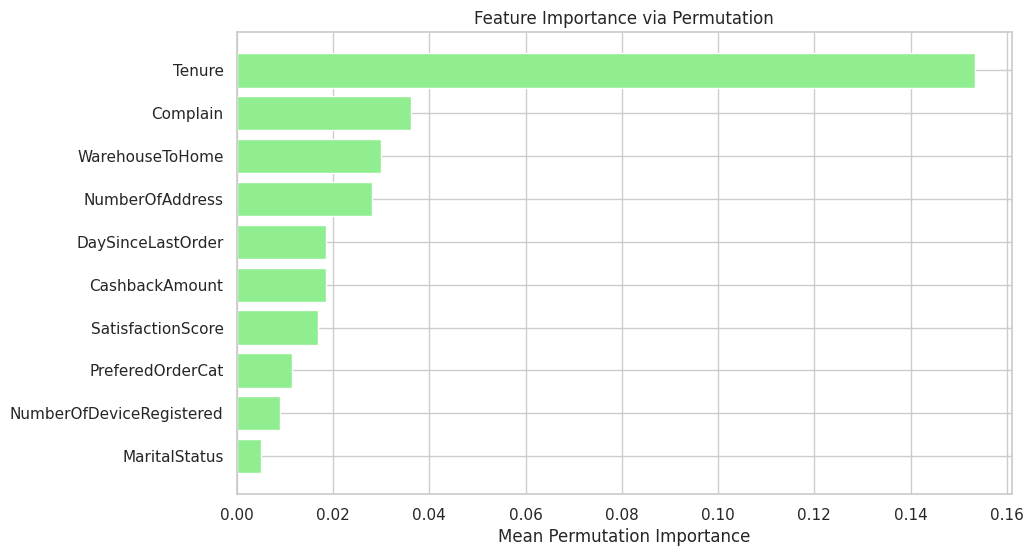

In [127]:
# Calculate permutation importance
perm_importance_result = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to store the importance values
perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Mean Importance': perm_importance_result.importances_mean,
})

# Sort the DataFrame by importance values
perm_importance_df = perm_importance_df.sort_values(by='Mean Importance', ascending=False)

# Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Mean Importance'], color='lightgreen')
plt.xlabel('Mean Permutation Importance')
plt.title('Feature Importance via Permutation')
plt.gca().invert_yaxis()
plt.show()

Based on the permutation importance plot, we can conclude that the following features have the highest impact on predicting customer churn for Treepedia:

**Tenure**
- **Importance:** This feature has the highest permutation importance, indicating it plays a significant role in the prediction model. The tenure of a customer in the company is a crucial factor in determining their likelihood of churning. Longer tenures might correlate with higher loyalty and lower churn rates.

**Complaint**
- **Importance:** This feature is the second most important. Complaints raised in the last month are strong indicators of potential churn. Customers with recent complaints may have a higher likelihood of leaving the company.

**Preferred Order Category (Mobile Phone)**
- **Importance:** This feature also has a significant influence on predictions. Customers who prefer ordering mobile phones may exhibit different churn behaviors compared to those preferring other categories.

**Marital Status (Married)**
- **Importance:** This feature shows moderate importance. The marital status of customers, particularly those who are married, can impact their loyalty and likelihood of churning.

**Satisfaction Score**
- **Importance:** This feature has a noticeable impact on predictions. The satisfaction score given by customers for the service is a direct indicator of their happiness with the company, affecting churn rates.

**Day Since Last Order**
- **Importance:** This feature has a lesser but still important role. The number of days since the last order can indicate the recency of customer engagement and their likelihood of continuing with the service.

**Cashback Amount**
- **Importance:** This feature has the lowest importance among the significant ones. The average cashback amount received by customers can influence their satisfaction and retention.

These results suggest that our XGBoost model identifies key features impacting customer churn, allowing us to focus on areas like customer tenure, complaints, and satisfaction to proactively address and reduce churn rates.

# <b>6. Conclusions and Recommendations

## <b>6.1. Conclusions  

The project successfully developed an XGBoost model to predict customer churn for Treepedia. The model's high recall demonstrates its ability to identify a significant proportion of customers at risk of churning. While the model's precision is not perfect, it offers valuable insights into the factors influencing churn and lays the groundwork for effective retention strategies.



## <b>6.2. Business Simulation

In [128]:
print('Model can reduce loss by $', round(loss_without_model - loss_with_model, 2))
print('Model can increase profit by $', round(profit_with_model - profit_without_model, 2))

Model can reduce loss by $ 37044
Model can increase profit by $ 68544


In [129]:
loss_profit_diff(y_test, y_pred_xgb_model)

Without the Model - Total Loss: $53000.000
Using the Model - Total Loss: $15956.000 (-69.894% decrease compared to no model)

Without the Model - Total Profit: $219000.000
Using the Model - Total Profit: $287544.000 (31.299% increase compared to no model)


## <b>6.3. Model Limitation

- Data Limitations: The model's accuracy is dependent on the quality and representativeness of the available data. It may not fully capture all nuances of customer behavior due to missing data or unrecorded variables.
- Feature Limitations: The features used in the model may not encompass all potential factors influencing churn. Additional features, such as customer service interactions or website engagement metrics, could enhance predictive power.
- Generalizability: The model's performance may vary if applied to customer segments or time periods not represented in the training data. Continuous monitoring and retraining are essential to maintain its effectiveness.


In [130]:
X_train.describe().loc[['min', 'max']].T

,min,max
Tenure,0.00,31.00
WarehouseToHome,5.00,36.00
NumberOfDeviceRegistered,1.00,6.00
SatisfactionScore,1.00,5.00
NumberOfAddress,1.00,11.00
Complain,0.00,1.00
DaySinceLastOrder,0.00,18.00
CashbackAmount,110.09,324.99


In [131]:
for col in cat:
  print(col, df[col].unique())

PreferedOrderCat ['Laptop & Accessory' 'Mobile Phone' 'Fashion' 'Others' 'Grocery']
MaritalStatus ['Single' 'Married' 'Divorced']


## <b>6.4. Recommendations

### <b>6.4.1. Business Insights

- Focus on "Laptop & Accessory" Category: Investigate the reasons for this category's low churn rate. Identify the factors contributing to customer satisfaction and loyalty within this category, and consider how these strategies can be applied to other product categories.
- Targeted Interventions for High-Churn Categories: Analyze the "Others," "Fashion," and "Grocery" categories to identify specific pain points or issues leading to churn. Develop tailored retention campaigns (e.g., personalized offers, educational content, improved customer service) to address these issues.
- Personalized Marketing: Utilize the model to segment customers based on their predicted churn risk. Deliver personalized messages and offers to high-risk customers to incentivize continued engagement and purchases.
- Loyalty Programs: Design and implement loyalty programs that reward repeat purchases and engagement, particularly for customers in high-churn categories.

### <b>6.4.2. Who Will Use the Model  

- Marketing Team: Design and execute targeted retention campaigns, analyze campaign effectiveness, and optimize marketing spend.
- Customer Service Team: Proactively reach out to high-risk customers identified by the model to address concerns, offer support, and resolve issues that may be contributing to churn.
- Product Team: Use insights from the model to identify areas where products or the overall shopping experience can be improved to enhance customer satisfaction and reduce churn.
- Executive Team: Monitor the overall impact of the churn prediction model on revenue and profitability, and make strategic decisions based on data-driven insights.

### <b>6.4.3. When the Model Will be Used

- Real-Time: Integrate the model into the website to provide personalized recommendations and offers to customers based on their predicted churn risk.
- Regular Updates: Refresh churn predictions frequently (e.g., weekly or bi-weekly) to ensure the model adapts to changing customer behavior and remains accurate.
- Post-Purchase Follow-Up: Trigger targeted emails and offers based on purchase history and predicted churn risk to encourage repeat business and increase customer lifetime value.
- Periodic Review (Monthly/Quarterly): Conduct regular performance reviews of the model and retention strategies to assess effectiveness and identify areas for improvement.

By adopting a data-driven approach to customer churn prediction and proactively implementing targeted retention strategies, Treepedia can significantly reduce revenue loss, enhance customer loyalty, and foster sustainable growth in the competitive e-commerce landscape.